# **Business Case: Aerofit - Descriptive Statistics & Probability**

## **About Aerofit**
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

### **Product Portfolio:**
1. The KP281 is an entry-level treadmill that sells for $1,500.

2. The KP481 is for mid-level runners that sell for $1,750.

3. The KP781 treadmill is having advanced features that sell for $2,500.

## **Business Problem:**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a **better recommendation of the treadmills to the new customers**. The team wants to investigate whether there are differences across the product with respect to customer characteristics.

So we need to:

1.   Perform descriptive analytics **to create a customer profile** for each AeroFit treadmill product by developing appropriate tables and charts.
2.   For each AeroFit treadmill product, construct **two-way contingency tables** and compute all **conditional and marginal probabilities** along with their insights/impact on the business.





## **What good looks like?**

## **1. Importing the dataset and usual data analysis steps like checking the structure & characteristics of the dataset.**

In [1]:
#Importing required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
#Loading data as pandas dataframe
df = pd.read_csv("aerofit_treadmill.csv")

In [3]:
#dataframe
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.tail(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [5]:
#shape of the dataset
df.shape

(180, 9)

In [6]:
#data type of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [10]:
#statistical summary
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [14]:
#missing value detection
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### **Observation:**
1.	There are 180 rows and 9 columns in dataset.
2.	6 columns have “int” datatype and 3 have “object” datatype.
3.	 There are 3 unique products with **KP281** being most frequent.
4.	Mean age of customers is **28.8 years** and their mean education is 15.6 years.
5.	Out of 180 customers 104 are Males and 107 are Partnered.
6.	There are **no missing values** in the dataset.


## **2. Detecting Outliers.**

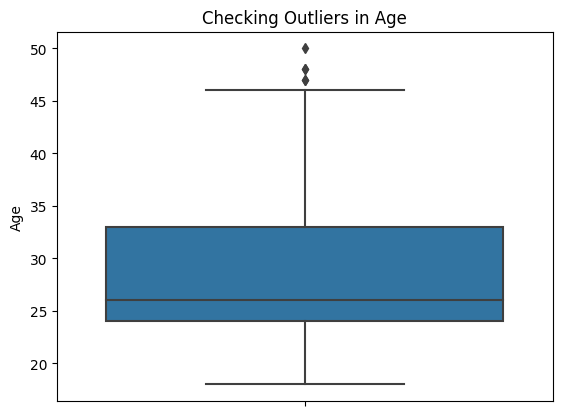

In [34]:
#Age
sns.boxplot(y=df["Age"])
plt.title(("Checking Outliers in Age"))
plt.show()

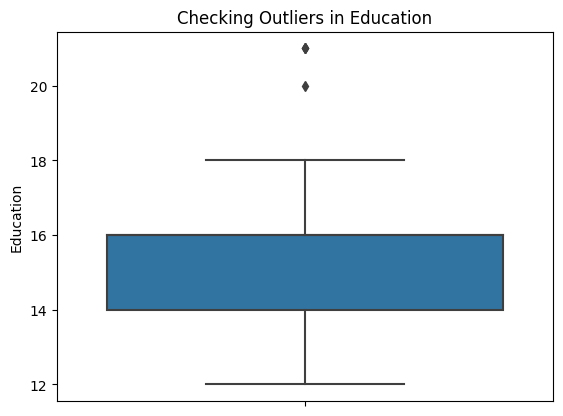

In [35]:
#Education
sns.boxplot(y=df["Education"])
plt.title(("Checking Outliers in Education"))
plt.show()

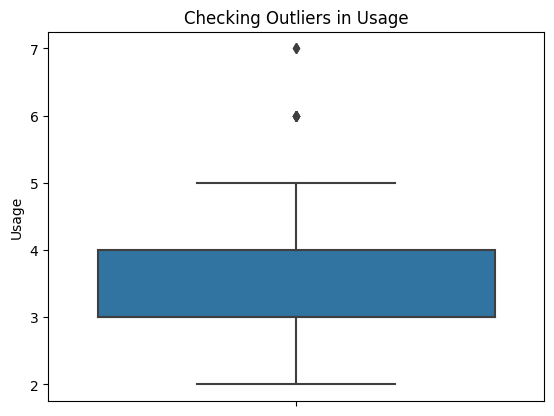

In [36]:
#Usage
sns.boxplot(y=df["Usage"])
plt.title(("Checking Outliers in Usage"))
plt.show()

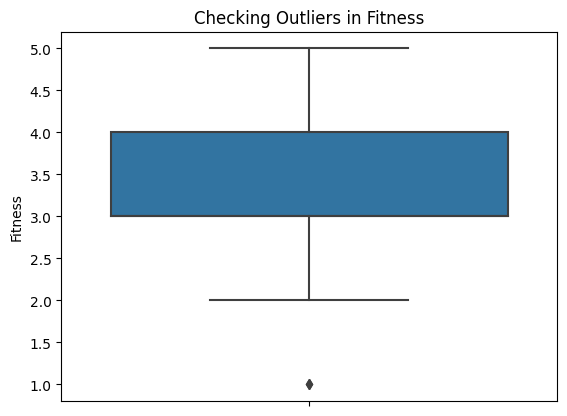

In [37]:
#Fitness
sns.boxplot(y=df["Fitness"])
plt.title(("Checking Outliers in Fitness"))
plt.show()

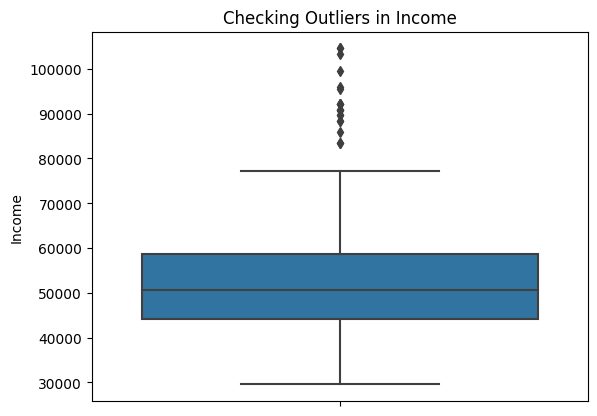

In [38]:
#Income
sns.boxplot(y=df["Income"])
plt.title(("Checking Outliers in Income"))
plt.show()

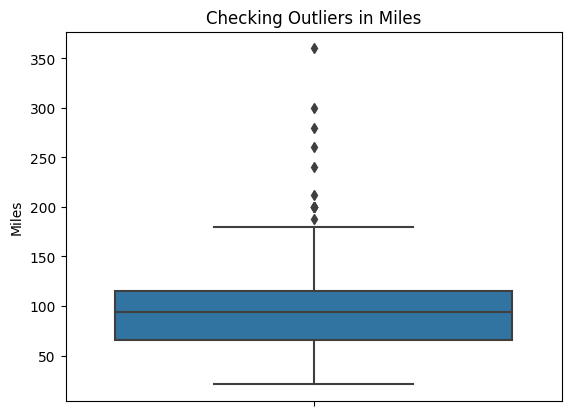

In [39]:
#Miles
sns.boxplot(y=df["Miles"])
plt.title(("Checking Outliers in Miles"))
plt.show()

### **Observation:**
1.	Age, Education, Usage and Fitness data have **very few** outliers.
2.	Income and Miles have **large number** of outliers.


## **3. Checking if features like marital status, gender, and age have any effect on the product purchased.**

### **For Categorical Variables:**

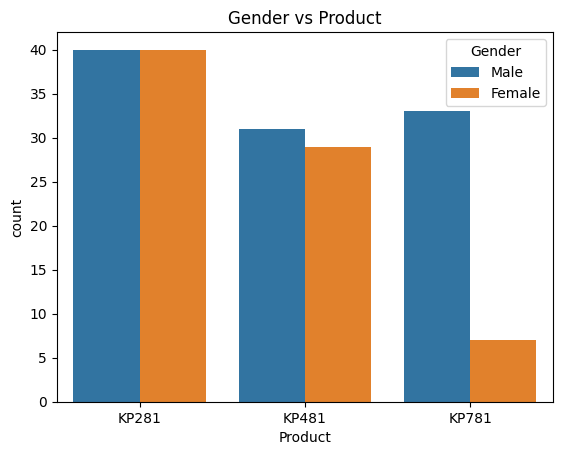

In [40]:
#Gender
sns.countplot(x="Product", data=df, hue="Gender")
plt.title("Gender vs Product")
plt.show()

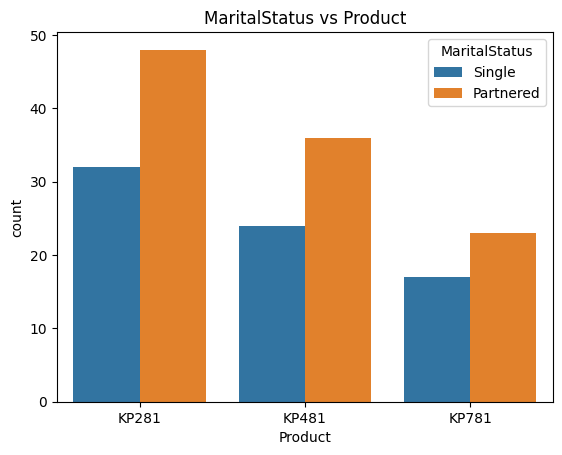

In [33]:
#MaritalStatus
sns.countplot(x="Product", data=df, hue="MaritalStatus")
plt.title("MaritalStatus vs Product")
plt.show()

### **For Continuous Variables**

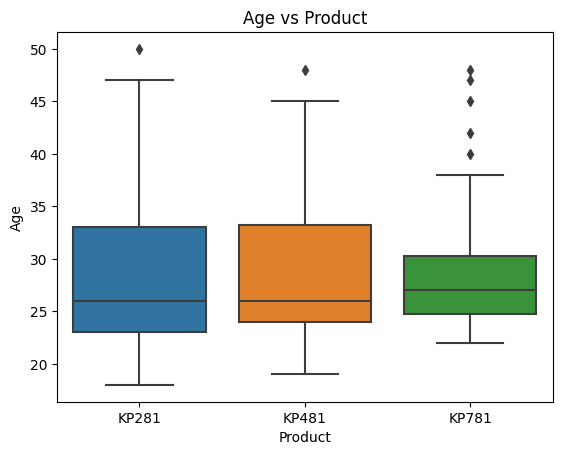

In [47]:
#Age
sns.boxplot(x="Product", y="Age", data=df)
plt.title("Age vs Product")
plt.show()

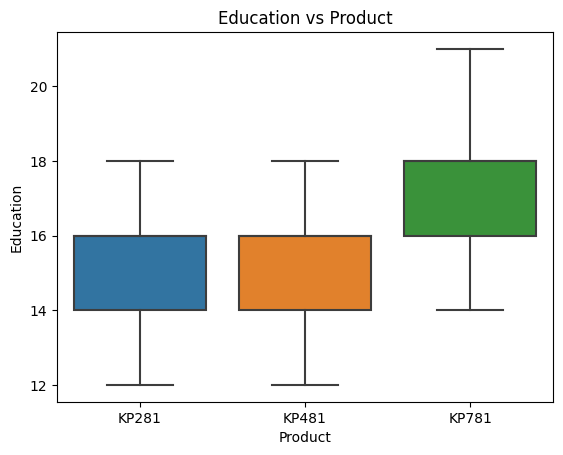

In [42]:
#Education
sns.boxplot(x="Product", y="Education", data=df)
plt.title("Education vs Product")
plt.show()

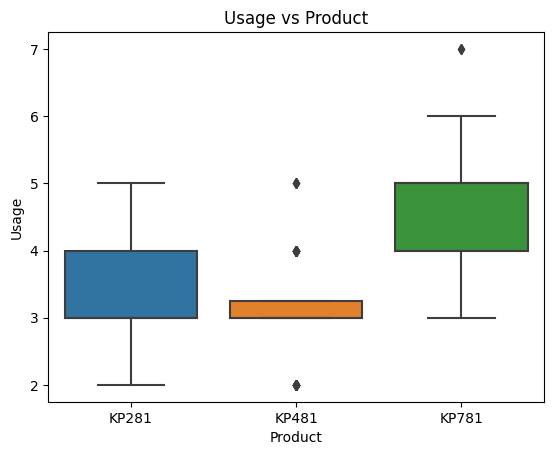

In [43]:
#Usage
sns.boxplot(x="Product", y="Usage", data=df)
plt.title("Usage vs Product")
plt.show()

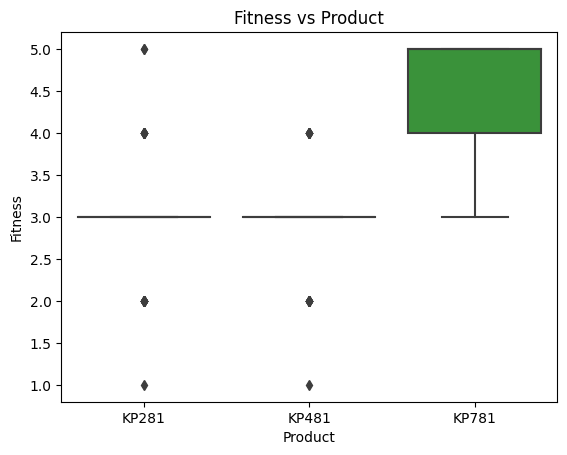

In [44]:
#Fitness
sns.boxplot(x="Product", y="Fitness", data=df)
plt.title("Fitness vs Product")
plt.show()

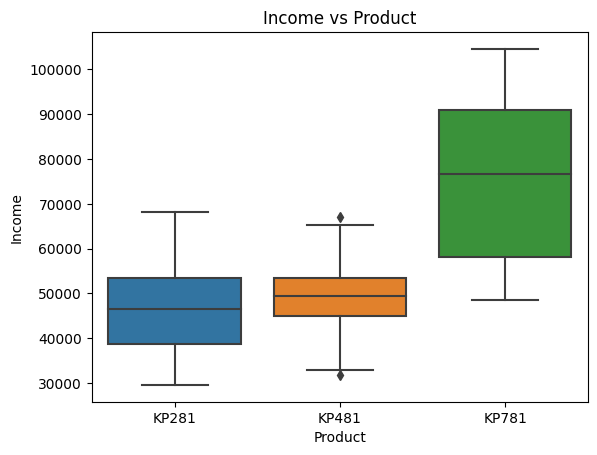

In [48]:
#Income
sns.boxplot(x="Product", y="Income", data=df)
plt.title("Income vs Product")
plt.show()

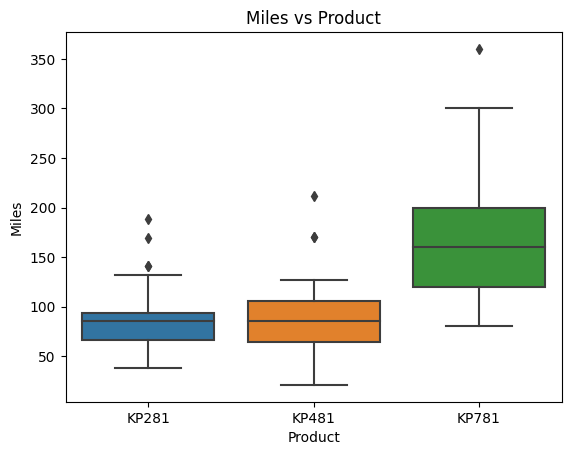

In [46]:
#Miles
sns.boxplot(x="Product", y="Miles", data=df)
plt.title("Miles vs Product")
plt.show()

### **Observation:**
1.	Most **popular** product KP281 is equally popular among Males and Females.
2.	KP781 has been primarily purchased by **Male** customers.
3.	**Partnered** customers are more likely to purchase all the three Products compared to Single customers.
4.	Median for both product KP281 and KP481 are same around **26 years** and median for KP781 is slightly higher.
5.	Age of almost 50% of the customers who purchased **KP781** lies roughly between 25 to 30 years.
6.	Customers having **more than 16 years** of Education are more likely to purchase KP781.
7.	Customers having **less than 16 years** of education are equally likely to purchase KP281 or KP481.
8.	Customers who are planning to use treadmill **more than 4 times** a week are more likely to purchase KP781.
9.	Customers who rate themselves **High on the Fitness scale** are more likely to purchase KP781.
10.	Customers who rate themselves **Average on the Fitness** scale are more likely to go for KP281 or KP481.
11.	Customer with **Higher income** i.e. income >=60000 dollers per annum are more likely to purchase KP781.
12.	Customers with **Lower income** i.e. income < 50000 dollars per annum are more likely to go for KP281.
13.	Customers who are expected to walk/run **more miles per week** (miles>120) are more likely to purchase KP781 where as customer with expected walking/running miles of **less than 120 miles per week** are more likely to go for KP281 or KP481.


## **4. Representing the Probability**

### **Probability of purchasing product based on Gender and MaritalStatus.**

In [60]:
#Probability of buying each product based on Gender.
pd.crosstab(index=df["Product"], columns=df["Gender"], margins=True, normalize=True)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


In [61]:
#Probability of buying each product based on MaritalStatus.
pd.crosstab(index=df["Product"], columns=df["MaritalStatus"], margins=True, normalize=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


In [81]:
print("P(KP281):",0.44)
print("P(KP481):",0.33)
print("P(KP781):",0.22)
print("\n")
print("P(Male):",np.round(0.577778,2))
print("P(Female):",np.round(0.422222,2))
print("P(Partnered):",np.round(0.594444,2))
print("P(Single):",np.round(0.405556,2))

P(KP281): 0.44
P(KP481): 0.33
P(KP781): 0.22


P(Male): 0.58
P(Female): 0.42
P(Partnered): 0.59
P(Single): 0.41


### **Conditional Probability of purchasing product based on Gender and MaritalStatus.**

In [62]:
#Gender
pd.crosstab(index=df["Product"], columns=df["Gender"], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [69]:
print("P(KP281/Male):",np.round(40/104,2))
print("P(KP481/Male):",np.round(31/104,2))
print("P(KP781/Male):",np.round(33/104,2))
print("\n")
print("P(KP281/Female):",np.round(40/76,2))
print("P(KP481/Female):",np.round(29/76,2))
print("P(KP781/Female):",np.round(7/76,2))

P(KP281/Male): 0.38
P(KP481/Male): 0.3
P(KP781/Male): 0.32


P(KP281/Female): 0.53
P(KP481/Female): 0.38
P(KP781/Female): 0.09


In [70]:
#MaritalStatus.
pd.crosstab(index=df["Product"], columns=df["MaritalStatus"], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [72]:
print("P(KP281/Partnered):",np.round(48/107,2))
print("P(KP481/Partnered):",np.round(36/107,2))
print("P(KP781/Partnered):",np.round(23/107,2))
print("\n")
print("P(KP281/Single):",np.round(32/73,2))
print("P(KP481/Single):",np.round(24/73,2))
print("P(KP781/Single):",np.round(17/73,2))

P(KP281/Partnered): 0.45
P(KP481/Partnered): 0.34
P(KP781/Partnered): 0.21


P(KP281/Single): 0.44
P(KP481/Single): 0.33
P(KP781/Single): 0.23


### **Probability of purchasing product based on Age Group.**

In [76]:
df["Age_Groups"] = pd.cut(df["Age"], bins=[15,25,35,45,55], labels=["15-25","26-35","36-45","46-55"])
pd.crosstab(index=df["Product"], columns=df["Age_Groups"], margins=True, normalize=True)

Age_Groups,15-25,26-35,36-45,46-55,All
Product,,,,,
KP281,0.188889,0.177778,0.061111,0.016667,0.444444
KP481,0.155556,0.133333,0.038889,0.005556,0.333333
KP781,0.094444,0.094444,0.022222,0.011111,0.222222
All,0.438889,0.405556,0.122222,0.033333,1.000000


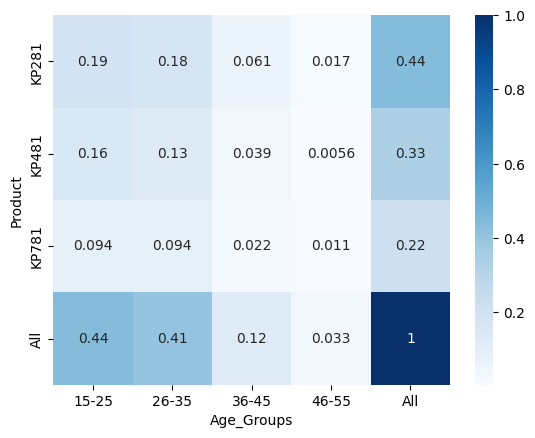

In [82]:
sns.heatmap(pd.crosstab(index=df["Product"], columns=df["Age_Groups"], margins=True, normalize=True), annot=True,cmap="Blues")
plt.show()

### **Observation:**
1.	**KP281** has the **highest probability** of getting purchased and KP781 has the lowest probability of getting purchased.
2.	**Male and Partnere**d customers have higher probability of buying a product.
3.	Female and Single customers have slightly lower probability of buying a product.
4.	**Female** customers have **highest probability** of buying **KP281** treadmill.
5.	**Female** customers have **very low probability** of buying **KP781** treadmill.
6.	Male customers have equal probability of buying all the three products.
7.	Being Single or Partnered does not have effect on probability of buying a specific product.
8.	Customers of age **between 15 to 35 years** have **very High probability** of buying the product whereas customers of age between 35 to 55 years have very low probability of buying any product.


## **5. Checking the correlation among different factors**

In [83]:
df=df.drop(columns=["Age_Groups"])

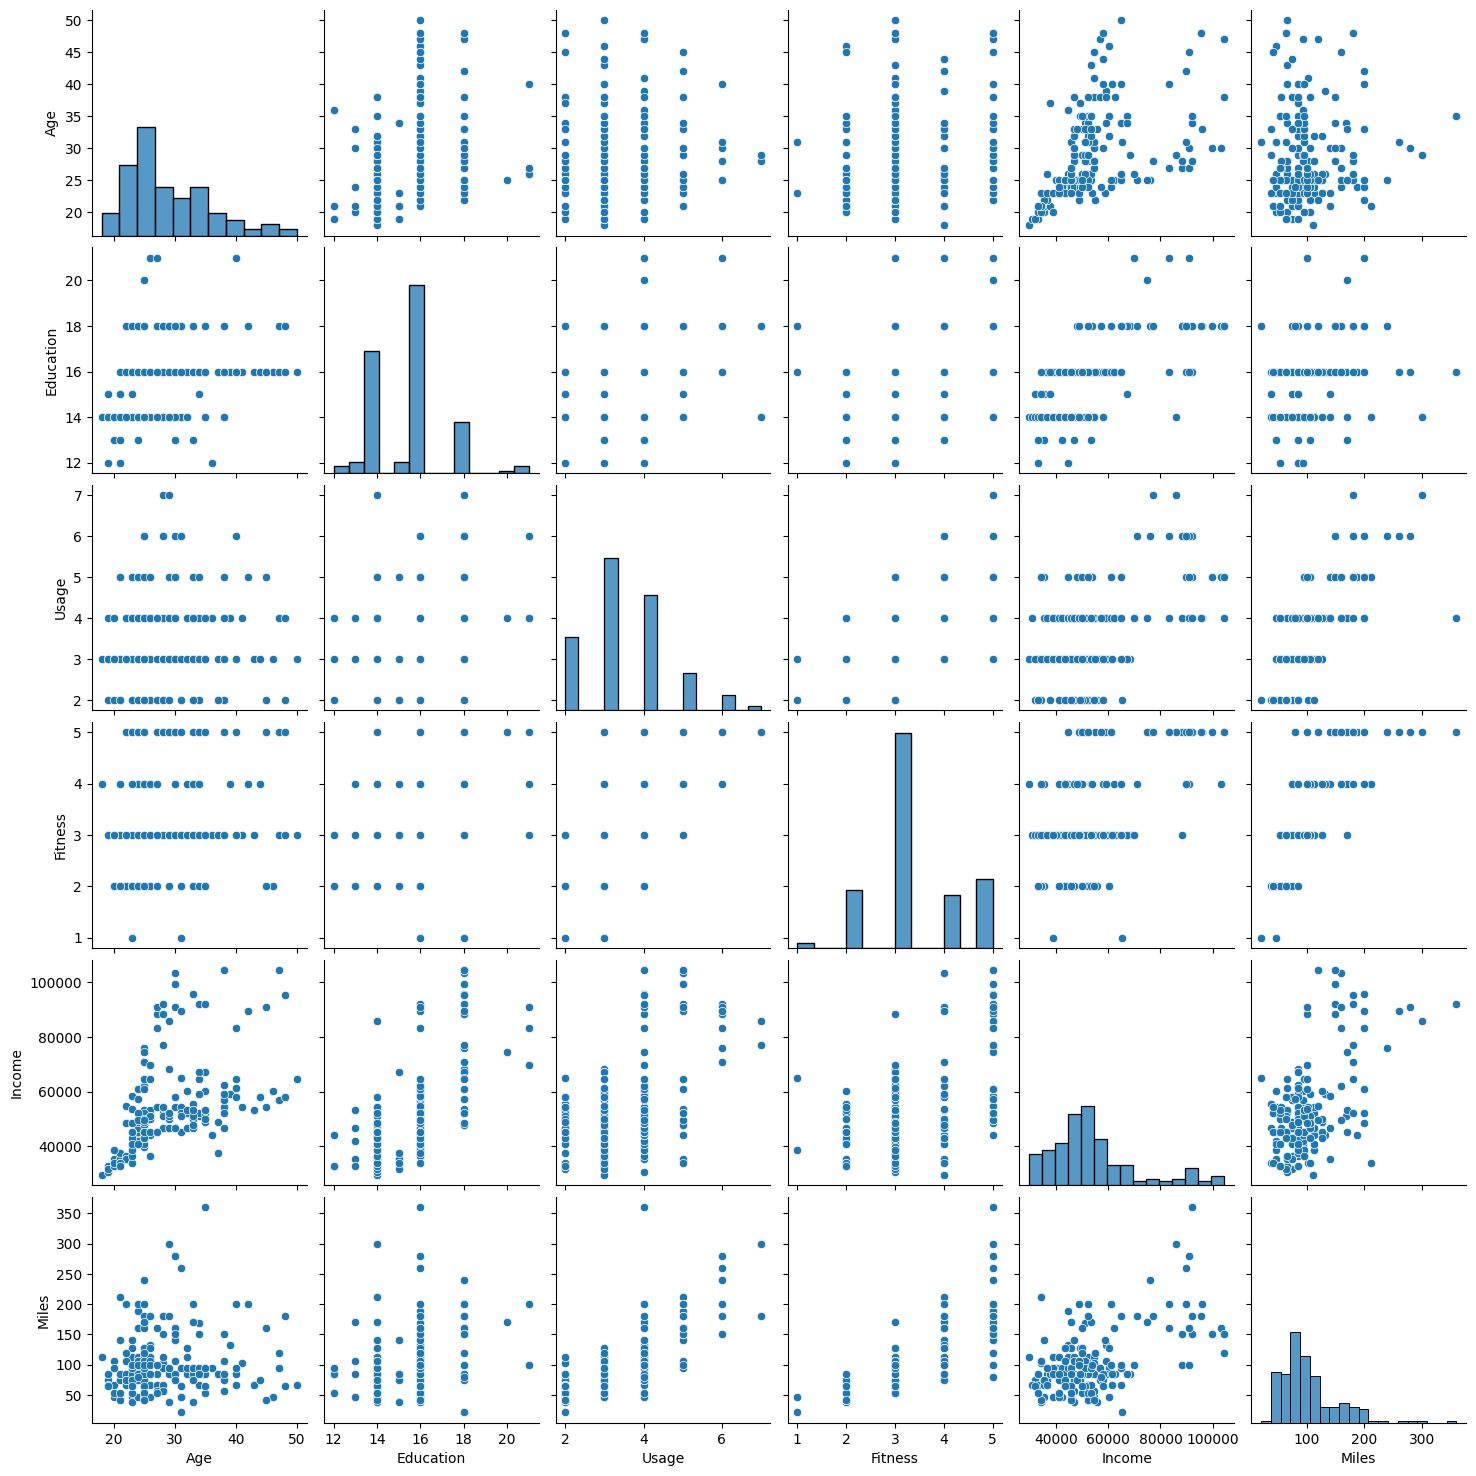

In [85]:
sns.pairplot(data=df)

In [86]:
df.corr()

<ipython-input-86-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<ipython-input-92-cc7cc258d046>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Blues")


<Axes: >

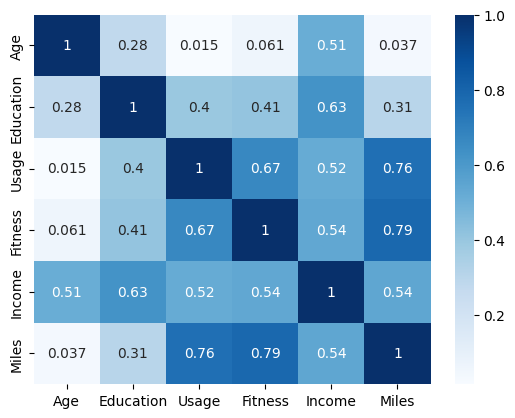

In [92]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")

### **Observation:**

There is a **positive correlation** between,
1.	Miles and Usage
2.	Miles and Fitness
3.	Usage and Fitness
4.	Education and Income

There is virtually **no correlation** between,
1.	Age and Miles
2.	Age and Fitness
3.	Age and Usage



## **6. Customer profiling and recommendations.**

## **Customer Profiling:**

### **KP281**
1.	**Gender:** Both genders likely to purchase.
2.	**Marital Status:** Partnered persons are more likely to purchase than Single persons.
3.	**Age:** Persons between 15 to 35 years are more likely to purchase.
4.	**Education:** Customers having less than 16 years of education are more likely to purchase.
5.	**Usage:** Customers who are planning to use treadmill less than 4 times a week are more likely to purchase.
6.	**Fitness:** Customers who rate themselves Average on the Fitness scale are more likely to purchase.
7.	**Income:** Customers with lower income i.e. income < 50000$ per annum are more likely to purchase.
8.	**Miles:** Customer with expected walking/running miles of less than 120 miles per week are more likely to purchase.



### **KP481**
1.	**Gender:** Both genders likely to purchase.
2.	**Marital Status:** Partnered persons are more likely to purchase than Single persons.
3.	**Age:** Persons between 15 to 35 years are more likely to purchase.
4.	**Education:** Customers having less than 16 years of education are more likely to purchase.
5.	**Usage:** Customers who are planning to use treadmill less than 4 times a week are more likely to purchase.
6.	**Fitness:** Customers who rate themselves Average on the Fitness scale are more likely to purchase.
7.	**Income:** Customer with income between 45000 to 55000$ per annum are more likely to purchase.
8.	**Miles:** Customer with expected walking/running miles of less than 120 miles per week are more likely to purchase.


### **KP781**
1.	**Gender:** Males are more likely to purchase. Females are very less likely to purchase.
2.	**Marital Status:** Partnered persons are more likely to purchase than Single persons.
3.	**Age:** Persons between 22 to 30 years are more likely to purchase.
4.	**Education:** Customers having more than 16 years of education are more likely to purchase.
5.	**Usage:** Customers who are planning to use treadmill more than 4 times a week are more likely to purchase.
6.	**Fitness:** Customers who rate themselves High on the Fitness scale are more likely to purchase.
7.	**Income:** Customer with Higher income i.e. income >=60000$ per annum are more likely to purchase.
8.	**Miles:** Customer with expected walking/running miles of more than 120 miles per week are more likely to purchase.


## **Recommendations:**
1.	New customers with **income higher** than 60000 dollers per annum should be recommended **KP781** treadmill. Since price will be less of a constrain, they will get attracted by the advanced features of KP781.
2.	Customer with income **less than 40000** dollers per annum should be recommended **KP281** as the lower price of KP281 will attract them to make a purchase.
3.	Customers with income **between 40000 to 60000$** should be recommended both KP281 and KP481 treadmills.
4.	New **Female customers** are very less likely to purchase KP781. So, they should be **recommended KP281 and KP481** treadmills which they are more likely to purchase.
5.	**Fitness enthusiast** customers who rate themselves high on fitness scale and expect to run/walk more than 120 miles a week should be recommended **KP781**, since such customers are more likely to purchase better product which offer more features.
6.	New Customers who rate themselves **average** on fitness scale and plan to run/walk **less than 120 miles** a week should be shown recommendations for **KP281 and KP481** treadmills, since such customers are very less likely to invest large amount of money in such fitness products.
7.	Young customers between age 15 to 35 should be shown recommendation of treadmills as they are more likely to purchase it. In this age group customers **between age 22 to 30** years should be recommended **KP781** more as they are more likely to buy it.
8.	Customers with **less education** years should be recommended K**P281 and KP481** as they are more likely to buy them and **highly educated** customers should be recommended **KP781** as they are more likely to buy them.
9.	**Partnered persons** should be recommended treadmills more than Single persons. Partnered persons are more likely to be settled and have a house and thus a more likely to purchase heavy fitness equipment like treadmills than Single persons who are more mobile.
